In [19]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import math

In [2]:
chrome_options = Options()
chrome_options.add_argument('window-size=640x640')
driver = webdriver.Chrome(options=chrome_options)
#driver.set_window_size(640,640)

#driver.get("http://www.abc.net.au")
driver.get("http://localhost:3000/web1")
current_window_size = driver.get_window_size(windowHandle='current')
print("current window size",driver.get_window_size(windowHandle='current'))
element_input = driver.find_element("xpath","//input[@id='firstName']")
element_label = driver.find_element(By.XPATH, '/html/body/div/main/main/nav/main/div/form/div[1]/div[1]/label')
print("location of element input",element_input.location)
print("size of element input", element_input.size)
print("location of element_label",element_label.location)
print("size of element_label",element_label.size)

current window size {'width': 1200, 'height': 1011}
location of element input {'x': 255, 'y': 158}
size of element input {'height': 38, 'width': 423}
location of element_label {'x': 76, 'y': 134}
size of element_label {'height': 24, 'width': 81}


In [3]:
element_html = driver.find_element(By.XPATH, '/html')
print(element_html.location)
print(element_html.size)

{'x': 0, 'y': 0}
{'height': 512, 'width': 1200}


In [3]:

#image_height = current_window_size['height']
#image_width = current_window_size['width']

In [4]:
#driver.save_screenshot("screenshots/web.jpg")
element_html.screenshot("screenshots/web.jpg")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:352: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


True

(1200, 512)
(1200, 512)


/var/folders/58/gd1m2zgn4hzgrrx4xcds_bg80000gp/T/ipykernel_2059/79901434.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((element_html.size['width'], element_html.size['height']), Image.ANTIALIAS)


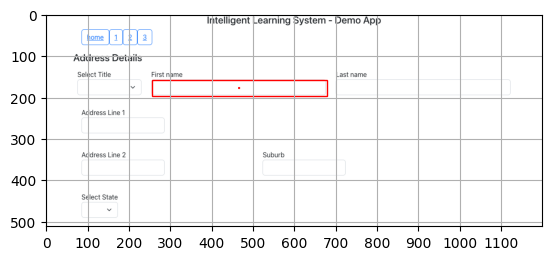

In [16]:
im = Image.open('screenshots/web.jpg')
print(im.size)

#resize
im = im.resize((element_html.size['width'], element_html.size['height']), Image.ANTIALIAS)
print(im.size)

# Create figure and axes
fig, ax = plt.subplots()

# grid spacing
x_ticks = np.arange(0, element_html.size['width'], 100)
y_ticks = np.arange(0, element_html.size['height'], 100)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.grid(True)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((element_input.location['x'], element_input.location['y']), element_input.size['width'], element_input.size['height'], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#find centre of the input
x_centre = element_input.location['x']+ (element_input.size['width']/2.0)
y_centre = element_input.location['y']+ (element_input.size['height']/2.0)

#plot cente
cir = patches.Circle((x_centre, y_centre), radius = 1, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(cir)

plt.show()

In [27]:
print(y_centre)
print(y_centre/100)
print(math.floor(y_centre/100))

print(x_centre)
print(x_centre/100)
print(math.floor(x_centre/100))

if math.ceil(y_centre/100)>0:
    grid_num = (math.floor(y_centre/100) * 12) + (math.floor(x_centre/100) + 1)
    
print(grid_num)

177.0
1.77
1
466.5
4.665
4
17


In [14]:
# Display the image
ax.imshow(im)


num_horizontal_grids = 10
num_vertical_grids = 12
#fig, ax = plt.subplots(figsize=(num_horizontal_grids, num_vertical_grids))
ax.set_xlim(0, num_vertical_grids)
ax.set_ylim(num_horizontal_grids, 0)
ax.grid(True)
ax.set_xticks(np.arange(0, num_vertical_grids + 1, 1.0))
ax.set_yticks(np.arange(0, num_horizontal_grids + 1, 1.0))


# create tuples of positions
positions = [(x + 0.05, y + 0.5) for y in range(num_horizontal_grids) for x in range(num_vertical_grids)]


grid_num = 1
for x,y in positions:
    ax.text(x,y, grid_num, color = "blue")
    grid_num+=1


plt.show()

In [13]:
driver.close()